In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [47]:
transform = transforms.ToTensor()

In [48]:
train_data= datasets.MNIST(root = "/digit_data", train = True,transform = transform,download = True)

In [49]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /digit_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data= datasets.MNIST(root="/digit_data",train =False,transform=transform,download=True)

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /digit_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
train_load = DataLoader(train_data,batch_size = 10, shuffle= True)
test_load = DataLoader(test_data,batch_size = 10, shuffle= True)

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(1,32,3,1)
        self.conv2 = nn.Conv2d(32,64,3,1)

        self.fc1 = nn.Linear(1600,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)

    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)
        
        x = torch.flatten(x, start_dim=1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x


In [15]:
device =  torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN()

criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(),lr = 0.01)

In [42]:
def train(epoch):
    model.train()
    
    for batch_idx, (data, target) in enumerate (train_load):
        data,target = data.to(device), target.to(device)
        optim.zero_grad()
        output = model(data)
        loss = criterion(output,target)
        loss.backward()
        optim.step()
        if batch_idx % 20 == 0:
            print(f'\rTrain Epoch: {epoch} [{batch_idx * len(data)}/{len(train_load.dataset)} ({100. * batch_idx / len(train_load):.0f}%)]', end='', flush=True)

    print(f'  Loss: {loss.item():.6f}')
def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data,target in test_load:
            data,target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output,target).item()
            pred = output.argmax(dim=1,keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    
    test_loss /= len(test_load.dataset)
    print(f'\nTest set: Average loss: {test_loss: .4f}, Accuracy {correct}/{len(test_load.dataset)} ({100. * correct / len(test_load.dataset):.0f}%\n)')
            

In [43]:
epochs = 5
for epoch in range(epochs):
    train(epoch)
    test()

Train Epoch: 0 [59800/60000 (100%)]  Loss: 0.032131

Test set: Average loss:  0.0165, Accuracy 9589/10000 (96%
)
Train Epoch: 1 [59800/60000 (100%)]  Loss: 0.035206

Test set: Average loss:  0.0152, Accuracy 9648/10000 (96%
)
Train Epoch: 2 [59800/60000 (100%)]  Loss: 0.011955

Test set: Average loss:  0.0170, Accuracy 9573/10000 (96%
)
Train Epoch: 3 [59800/60000 (100%)]  Loss: 0.188937

Test set: Average loss:  0.0134, Accuracy 9688/10000 (97%
)
Train Epoch: 4 [59800/60000 (100%)]  Loss: 0.173411

Test set: Average loss:  0.0154, Accuracy 9659/10000 (97%
)


In [44]:
from matplotlib import pyplot as plt

Prediction: 7


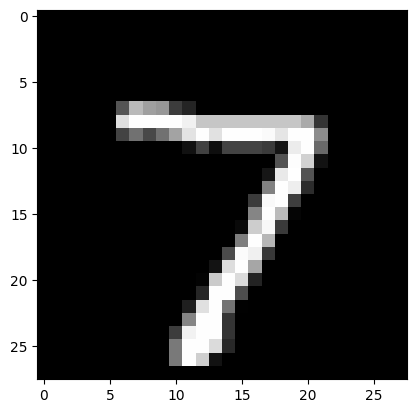

In [45]:
model.eval()
data,target = test_data[0]
data = data.unsqueeze(0)
output= model(data)
prediction = output.argmax(dim = 1,keepdim=True).item()
print(f"Prediction: {prediction}")

image = data.squeeze(0).squeeze(0).numpy()

plt.imshow(image,cmap="gray")
plt.show()